# Solving the Arsène Lupin problem with dynamic programming

@autors : Alanna DEVLIN-GENIN, Clément DIGOIN

As Arsène Lupin, you are planning to rob the various houses on a street. Each house contains a certain amount of money, which is known in advance. However, if you rob one house, you cannot rob the one next to it, you have to skip it because of its sophisticated connected detection system.

Given a vector of money amounts as input, we built an algorithm to work out which houses to rob in order to collect the maximum total amount of money.

In [1]:
# imports
import pandas as pd
import numpy as np
from plotnine import *

## Create a street

Create a grid modelling the houses of a street.

In [2]:
# generate the street grid
def street_grid(nx: int, seed:int = 1234, min_reward:int=0, max_reward:int=10):
  ''''
  This function defines the houses grid of a given street.

  Parameters
  ----------
  nx: int
    Number of houses in the street
  seed: int
    Set the seed for the random
  min_reward: int
    Minimum reward in the game
  max_reward: int
    Maximum reward in the game
  
  Returns
  -------
  pd.DataFrame
    Dataframe containing the following columns
      - x: identifier of the house
      - y: always equal to 1 (useful for graphs)
      - reward: loot in the house
      - is_stolen: is the house stolen? (init at False)
  '''
  ny = 1
  np.random.seed(seed=seed)
  return pd.DataFrame(
    [
      [
        x+1, 
        y+1, 
        np.random.randint(min_reward, max_reward),
        False
      ]
      for x in range(nx)
      for y in range(ny)
  ], columns = ['x', 'y', 'reward', 'is_stolen'])

Then we generate a grid to model the houses of a street.

In [3]:
# generate line of houses
nx = 10
df = street_grid(nx=nx, seed=16)
# see the dataset
df

,x,y,reward,is_stolen
0,1,1,9,False
1,2,1,9,False
2,3,1,5,False
3,4,1,1,False
4,5,1,4,False
5,6,1,4,False
6,7,1,9,False
7,8,1,0,False
8,9,1,0,False
9,10,1,8,False


## Plot the street

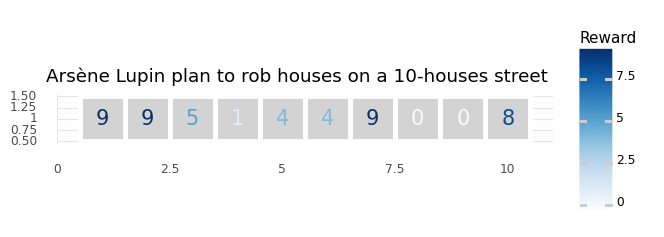

<ggplot: (8749916237023)>

In [4]:
# plot it
(
  ggplot(df) + 
    geom_tile(aes(x='x', y='y'), color="white", fill="lightgrey", size=2) + 
    geom_text(aes(x='x', y='y', label='reward', color='reward'), size=15)+
    scale_color_cmap(cmap_name="Blues") +
    theme(
      panel_grid = element_blank(),
      axis_text = element_blank(),
      axis_title_x = element_blank(),
      axis_text_x = element_blank(),
      axis_title_y = element_blank(),
      axis_text_y = element_blank(),
      axis_line = element_blank(),
      axis_ticks_major_x=element_blank(),
      axis_ticks_minor_x=element_blank(),
      axis_ticks_major_y=element_blank(),
      axis_ticks_minor_y=element_blank(),
    ) +
    coord_equal() +
    labs(
      title = "Arsène Lupin plan to rob houses on a 10-houses street",
      color = "Reward",
      x =  "",
      y =  ""
    ) +
    theme_minimal()
)

## Compute the robbery algorithm

Using dynamic programming we solved the problem for Arsène Lupin.

In [5]:
def robbery(data):
    ''''
    Given a street of house, compute the maximum loot you can rob.

    Parameters
    ----------
    data: pd.DataFrame
        Dataframe of the houses of a street
    
    Returns
    -------
    total: int
        Maximum loot
    '''
    prev, total = 0, 0
    for house, amount in enumerate(data['reward']):
        if prev + amount > total:
            data.loc[house, 'is_stolen'] = True
        prev, total = total, max(total, prev + amount)
    return total

In [6]:
# compute the maximum loot for our dataset
max_robbery = robbery(data=df)
print(f'Arsène Lupin can loot a maximum of {max_robbery}.')

Arsène Lupin can loot a maximum of 35.


## Result of the robbery

Lastly we presented the results of the robbery on a graph.

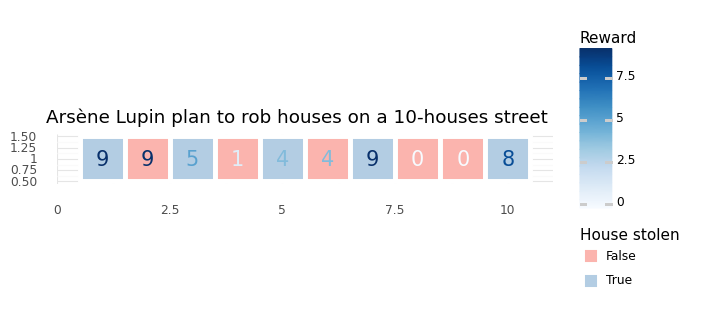

<ggplot: (8749914013489)>

In [7]:
# plot the result of the robbery
(
  ggplot(df) + 
    geom_tile(aes(x='x', y='y', fill='is_stolen'), color="white", size=2) + 
    geom_text(aes(x='x', y='y', label='reward', color='reward'), size=15)+
    scale_color_cmap(cmap_name="Blues") +
    scale_fill_brewer(type='qual', palette=4) +
    # scale_fill_brewer(type='qual', palette=6) +
    coord_equal() +
    labs(
      title = "Arsène Lupin plan to rob houses on a 10-houses street",
      color = "Reward",
      fill = "House stolen",
      x =  "",
      y =  ""
    ) +
    theme_minimal()
)